## 1. 필요한 패키지 불러오기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## 2. 탐색적 자료 분석(EDA)

In [5]:
data = pd.read_csv("./data/titanic_train.csv")
data = data.drop(columns=["PassengerId","Name","Cabin","Ticket"])
data = data.dropna()
data = data.reset_index().drop(columns=["index"])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [6]:
data.groupby("Survived").count().iloc[:,0]

Survived
0    424
1    288
Name: Pclass, dtype: int64

In [7]:
data["Pclass"] = pd.Categorical(data["Pclass"])
data = pd.get_dummies(data)
data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,39.0,0,5,29.1250,0,0,1,1,0,0,1,0
708,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
709,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
710,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [8]:
def normalization(data, variable):
    x = data[variable]
    return (x - x.min()) / (x.max() - x.min())

In [9]:
data[["Fare","Age"]] = normalization(data,["Fare", "Age"])
data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0,0,1,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,0,1,0,1,0,0
2,1,0.321438,0,0,0.015469,0,0,1,1,0,0,0,1
3,1,0.434531,1,0,0.103644,1,0,0,1,0,0,0,1
4,0,0.434531,0,0,0.015713,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0.484795,0,5,0.056848,0,0,1,1,0,0,1,0
708,0,0.334004,0,0,0.025374,0,1,0,0,1,0,0,1
709,1,0.233476,0,0,0.058556,1,0,0,1,0,0,0,1
710,1,0.321438,0,0,0.058556,1,0,0,0,1,1,0,0


In [10]:
x = data.drop(columns=["Survived"]).values
y = data["Survived"].values.reshape(-1,1)

## 3. 모델 만들기

In [11]:
def forward_sigmoid(x):
    # 활성화 함수의 
    return 1 / (1 + np.exp(-x))

In [12]:
def backward_sigmoid(x):
    return x(1-x)

In [13]:
# 내적과 활성화 함수를 포함한 순전파 과정
def cal_forward(X, W, B):
    Z = np.matmul(X,W) + B
    A = forward_sigmoid(Z)
    return Z, A

In [14]:
def binary_cross_entropy(y_hat:"예측값", y:"정답값"):
    # 손실함수는 스칼라값이 나와야함
    return -((y * np.log2(y_hat)) + ((1-y) * np.log2(1-y_hat)))

In [15]:
def backward_cross_entropy_sigmoid(y_hat, y):
    # 교차 엔트로피의 미분값과 시그모이드의 미분값을 곱하면 예측값과 정답값의 차이가 나옴
    return (y_hat - y)

In [16]:
# loss를 입력값으로 받는 역전파 과정
def cal_backward(dx,dy):
    return np.matmul(dx.T,dy)

In [17]:
n_iter = 1000
lr = 0.001
n_data, n_col = x.shape
losses = []

W1 = np.random.normal(size=(n_col, 10))
B1 = np.zeros(shape = (n_data, 10))

W2 = np.random.normal(size=(10,1))
B2 = np.zeros(shape = (n_data, 1))

for i in tqdm(range(n_iter)):
    # 순전파
    Z1, A1 = cal_forward(x, W1, B1)
    Z2, A2 = cal_forward(A1, W2, B2)

    # 손실함수
    entropy = binary_cross_entropy(A2, y)
    loss = np.mean(entropy)
    losses.append(loss)
    
    # 역전파
    # Z2의 변화량에 따른 loss의 변화량
    dloss_Z2 = backward_cross_entropy_sigmoid(A2, y)
    # B2, W2의 변화량에 따른 loss의 변화량
    dloss_B2 = dloss_Z2
    dloss_W2 = np.dot(A1.T, dloss_Z2)
    # A1, Z1, B1의 변화량에 따른 loss의 변화량
    dloss_A1 = np.dot(dloss_Z2,W2.T)
    dloss_Z1 = (A1 * (1 - A1)) * dloss_A1
    dloss_B1 = dloss_Z1
    # W1의 변화량에 따른 loss의 변화량
    dloss_W1 = np.dot(x.T, dloss_Z1)
    
    # 경사하강법
    W1 -= dloss_W1 * lr
    W2 -= dloss_W2 * lr
    B1 -= dloss_B1 * lr
    B2 -= dloss_B2 * lr

100%|██████████| 1000/1000 [00:01<00:00, 899.89it/s]


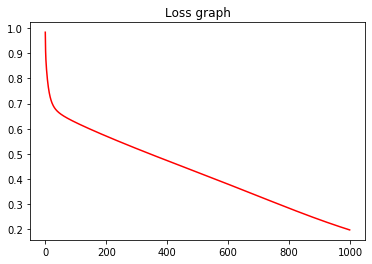

In [18]:
# lr를 0.1로 크게주고 epoch을 적게 주었더니 새로운 데이터에 대해서는 loss값이 튀는 현상인 fluctuation 발생
# 이상점 데이터가 있다고 판단하여 가중치의 변화율 (학습률)을 줄이고 
# 학습률을 줄어서 underfitting 문제를 해결하고자 epoch 횟수를 늘렸습니다.
plt.plot(losses, c = "r")
plt.title("Loss graph")
plt.show()

## 4. 모델 평가하기

In [175]:
# ROC 커브

bucket_recall = []
bucket_fallout = []
threshold = np.arange(0,1,0.1)
for i in threshold:
    pred_y = A2.copy()
    pred_y = (pred_y > i )
    true_y = (y == 1)

    matrix = np.concatenate([pred_y,true_y], axis=1)

    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for pred, true in matrix:
        if pred == True and true == True:
            TP += 1
        elif pred == True and true == False:
            FP += 1
        elif pred == False and true == True:
            TN += 1
        elif pred == False and true == False:
            FN += 1
    confusion_matrix = np.array([[TP,TN],
                                [FP,FN]])
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    accuracy = (TP + FN) / (TP + TN + FP + FN)
    fallout = FP / (TN + FP)

    bucket_recall.append(recall)
    bucket_fallout.append(fallout)

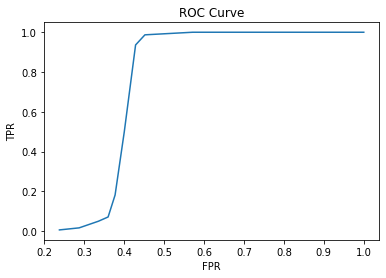

In [176]:
plt.plot(bucket_recall, bucket_fallout)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [172]:
bucket_recall

[1.0,
 0.5714285714285714,
 0.4519685039370079,
 0.42857142857142855,
 0.4002932551319648,
 0.3772455089820359,
 0.3597560975609756,
 0.33544303797468356,
 0.28716216216216217,
 0.23783783783783785]

In [177]:
bucket_fallout

[1.0,
 1.0,
 0.987012987012987,
 0.9361702127659575,
 0.5,
 0.18181818181818182,
 0.07142857142857142,
 0.05,
 0.016666666666666666,
 0.006369426751592357]

In [179]:
# auc curve가 급격하게 변화하는 지점의 threshold값은 0.4 입니다.
threshold[4]

0.4

In [180]:
pred_y = A2.copy()
pred_y = (pred_y > 0.4 )
true_y = (y == 1)

matrix = np.concatenate([pred_y,true_y], axis=1)

TP = 0
TN = 0
FP = 0
FN = 0
for pred, true in matrix:
    if pred == True and true == True:
        TP += 1
    elif pred == True and true == False:
        FP += 1
    elif pred == False and true == True:
        TN += 1
    elif pred == False and true == False:
        FN += 1
confusion_matrix = np.array([[TP,TN],
                            [FP,FN]])
recall = TP / (TP + FN)
precision = TP / (TP + FP)
accuracy = (TP + FN) / (TP + TN + FP + FN)

In [181]:
# threshold가 0.4 일때의 가장 성능이 좋은 모델이라는 결론이 나왔습니다.
accuracy

0.9578651685393258